# EDA

In [1]:
from datasets import get_dataset_config_names

In [2]:
xtreme_subsets = get_dataset_config_names("xtreme")
print(f"XTREME has {len(xtreme_subsets)} configurations")

XTREME has 183 configurations


In [3]:
panx_subsets = [s for s in xtreme_subsets if s.startswith("PAN")]
panx_subsets[:3]

['PAN-X.af', 'PAN-X.ar', 'PAN-X.bg']

In [4]:
# Load only PAN-X.de subset
from datasets import load_dataset
load_dataset("xtreme", name="PAN-X.de")

Reusing dataset xtreme (/Users/shamweelmohammed/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
})

In [5]:
# To make a realistic Swiss corpus, we’ll sample the German (de), French (fr), Italian
# (it), and English (en) corpora from PAN-X according to their spoken proportions.

from collections import defaultdict
from datasets import DatasetDict

langs = ["de", "fr", "it", "en"]
fracs = [0.629, 0.229, 0.084, 0.059]

panx_ch = defaultdict(DatasetDict)

for lang, frac in zip(langs, fracs):
    # Load monolingual corpus
    ds = load_dataset("xtreme", name=f"PAN-X.{lang}")
    # Shuffle and downsample each split according to spoken proportion
    for split in ds:
        panx_ch[lang][split] = (
        ds[split]
        .shuffle(seed=0)
        .select(range(int(frac * ds[split].num_rows))))

Reusing dataset xtreme (/Users/shamweelmohammed/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /Users/shamweelmohammed/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-7318edec81f76aa6.arrow
Parameter 'indices'=range(0, 6290) of the transform datasets.arrow_dataset.Dataset.select couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.
Loading cached shuffled indices for dataset at /Users/shamweelmohammed/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-cbd29dccd93ef58f.arrow
Loading cached shuffled indices for dataset at /Users/shamweelmohammed/.cach

  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /Users/shamweelmohammed/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-4a1996403248b4e2.arrow
Loading cached shuffled indices for dataset at /Users/shamweelmohammed/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-5d4f9e5aefa05972.arrow
Loading cached shuffled indices for dataset at /Users/shamweelmohammed/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-6789784a489dc7d6.arrow
Reusing dataset xtreme (/Users/shamweelmohammed/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /Users/shamweelmohammed/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-845df155c04c1192.arrow
Loading cached shuffled indices for dataset at /Users/shamweelmohammed/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-4038e5f0ccb7a363.arrow
Loading cached shuffled indices for dataset at /Users/shamweelmohammed/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-e220bc62f3b2de61.arrow
Reusing dataset xtreme (/Users/shamweelmohammed/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /Users/shamweelmohammed/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-2292d48c0b6f8502.arrow
Loading cached shuffled indices for dataset at /Users/shamweelmohammed/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-56d73ebf7717cb83.arrow
Loading cached shuffled indices for dataset at /Users/shamweelmohammed/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-5117c26f1eb0d215.arrow


In [6]:
import pandas as pd

pd.DataFrame({lang: [panx_ch[lang]["train"].num_rows] for lang in langs}, index=["Number of training examples"])

,de,fr,it,en
Number of training examples,12580,4580,1680,1180


In [7]:
element = panx_ch["de"]["train"][0]

for key, value in element.items():
    print(f"{key}: {value}")

tokens: ['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags: [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs: ['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']


In [8]:
for key, value in panx_ch["de"]["train"].features.items():
    print(f"{key}: {value}")

tokens: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags: Sequence(feature=ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], names_file=None, id=None), length=-1, id=None)
langs: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


In [9]:
tags = panx_ch["de"]["train"].features["ner_tags"].feature
print(tags)

ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], names_file=None, id=None)


In [10]:
def create_tag_names(batch):
    return {"ner_tags_str": [tags.int2str(idx) for idx in batch["ner_tags"]]}

panx_de = panx_ch["de"].map(create_tag_names)

  0%|          | 0/6290 [00:00<?, ?ex/s]

  0%|          | 0/6290 [00:00<?, ?ex/s]

  0%|          | 0/12580 [00:00<?, ?ex/s]

In [11]:
# The presence of the LOC tags make sense since the sentence “2,000 Einwohnern an der
# Danziger Bucht in der polnischen Woiwodschaft Pommern” means “2,000 inhabitants
# at the Gdansk Bay in the Polish voivodeship of Pomerania” in English, and
# Gdansk Bay is a bay in the Baltic sea, while “voivodeship” corresponds to a state in
# Poland.
de_example = panx_de["train"][0]
pd.DataFrame([de_example["tokens"], de_example["ner_tags_str"]],
['Tokens', 'Tags'])

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


In [12]:
# calculate the frequencies of each entity across each split
from collections import Counter

split2freqs = defaultdict(Counter)

for split, dataset in panx_de.items():
    for row in dataset["ner_tags_str"]:
        for tag in row:
            if tag.startswith("B"):
                tag_type = tag.split("-")[1]
                split2freqs[split][tag_type] += 1

pd.DataFrame.from_dict(split2freqs, orient="index")

,ORG,LOC,PER
validation,2683,3172,2893
test,2573,3180,3071
train,5366,6186,5810


In [13]:
# Multilingual transformer models are usually evaluated in three different ways:
# en
# Fine-tune on the English training data and then evaluate on each language’s test
# set.
# each
# Fine-tune and evaluate on monolingual test data to measure per-language
# performance.
# all
# Fine-tune on all the training data to evaluate on all on each language’s test set

# Tokenization

In [14]:
from transformers import AutoTokenizer

bert_model_name = "bert-base-cased"
xlmr_model_name = "xlm-roberta-base"

bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

In [15]:
text = "Jack Sparrow loves New York!"

bert_tokens = bert_tokenizer(text).tokens()
print(bert_tokens)
xlmr_tokens = xlmr_tokenizer(text).tokens()
print(xlmr_tokens)

['[CLS]', 'Jack', 'Spa', '##rrow', 'loves', 'New', 'York', '!', '[SEP]']
['<s>', '▁Jack', '▁Spar', 'row', '▁love', 's', '▁New', '▁York', '!', '</s>']


In [16]:
"".join(xlmr_tokens).replace(u"\u2581", " ")

'<s> Jack Sparrow loves New York!</s>'

# Custom Token Classification Model

In [17]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel

In [18]:
class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    config_class = XLMRobertaConfig

    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        # Model body
        self.roberta = RobertaModel(config, add_pooling_layer=False)
        # Token classification head
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)

        # Load and initialize weights
        self.init_weights()
    
    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None, **kwargs):
        # Use model body to get encoder representations
        outputs = self.roberta(input_ids, attention_mask, token_type_ids, **kwargs)
        # Use 1st output (from last layer) as encoder representations
        sequence_output = outputs[0]
        # Apply dropout for regularization
        sequence_output = self.dropout(sequence_output)
        logits = self.classifier(sequence_output)

        # Calculate losses
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
        
        # Return TokenClassifierOutput
        return TokenClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )


In [19]:
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}
print(index2tag)
print(tag2index)

{0: 'O', 1: 'B-PER', 2: 'I-PER', 3: 'B-ORG', 4: 'I-ORG', 5: 'B-LOC', 6: 'I-LOC'}
{'O': 0, 'B-PER': 1, 'I-PER': 2, 'B-ORG': 3, 'I-ORG': 4, 'B-LOC': 5, 'I-LOC': 6}


In [20]:
from transformers import AutoConfig

xlm_config = AutoConfig.from_pretrained(xlmr_model_name, num_labels=tags.num_classes, id2label=index2tag, label2id=tag2index)

In [21]:
import torch

if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

mps


In [22]:
xlmr_model = XLMRobertaForTokenClassification.from_pretrained(xlmr_model_name, config=xlm_config).to(device)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['roberta.pooler.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifie

In [23]:
input_ids = xlmr_tokenizer.encode(text, return_tensors="pt")
pd.DataFrame([xlmr_tokens, input_ids[0].numpy()], index=["Tokens", "Input IDs"])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Input IDs,0,21763,37456,15555,5161,7,2356,5753,38,2


In [24]:
outputs = xlmr_model(input_ids.to(device)).logits
print(f"Number of tokens in sequence: {len(xlmr_tokens)}")
print(f"Shape of outputs: {outputs.shape}") # (batch_size, sequence_length, num_tags)
print(f"Outputs: {outputs}")

predictions = torch.argmax(outputs, dim=-1)
print(f"Predictions: {predictions}")

Number of tokens in sequence: 10
Shape of outputs: torch.Size([1, 10, 7])
Outputs: tensor([[[ 0.2922,  0.6862, -0.7389,  0.0636, -0.2006, -0.1279,  0.1889],
         [ 0.2431,  0.3937, -0.4349,  0.3774, -0.3441, -0.1218,  0.3197],
         [ 0.0841,  0.4032, -0.5379,  0.3731, -0.2642, -0.3202,  0.1941],
         [ 0.1429,  0.3501, -0.4901,  0.3608, -0.3330, -0.2014,  0.3510],
         [ 0.2431,  0.4884, -0.3635,  0.4455, -0.3316, -0.0929,  0.2971],
         [ 0.1838,  0.4615, -0.4126,  0.3604, -0.3851, -0.1456,  0.3559],
         [ 0.2213,  0.4656, -0.4336,  0.3911, -0.3065, -0.1020,  0.3315],
         [ 0.3019,  0.4491, -0.3926,  0.3940, -0.3103, -0.1015,  0.3851],
         [ 0.2029,  0.5264, -0.4473,  0.3974, -0.3373, -0.1781,  0.2936],
         [ 0.3472,  0.5900, -0.7768,  0.1258, -0.2185, -0.1049,  0.1419]]],
       device='mps:0', grad_fn=<LinearBackward0>)
Predictions: tensor([[1, 1, 1, 3, 1, 1, 1, 1, 1, 1]], device='mps:0')


In [25]:
preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
pd.DataFrame([xlmr_tokens, preds], index=["Tokens", "Tags"])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Tags,B-PER,B-PER,B-PER,B-ORG,B-PER,B-PER,B-PER,B-PER,B-PER,B-PER


# Fine-tuning Setup

In [55]:
def tag_text(text, tags, model, tokenizer):
    tokens = tokenizer(text).tokens()

    # Encode the sequence into IDs
    input_ids = xlmr_tokenizer.encode(text, return_tensors="pt").to(device)

    # Get the model outputs
    model = model.to(device)
    outputs = model(input_ids).logits
    predictions = torch.argmax(outputs, dim=-1)

    # Get the predicted tags
    # Convert to DataFrame
    preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
    return pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])

In [27]:
# Since the XLM-R tokenizer returns the input IDs for the model’s inputs, we just need
# to augment this information with the attention mask and the label IDs that encode
# the information about which token is associated with each NER tag.

words, labels = de_example["tokens"], de_example["ner_tags"]
pd.DataFrame([words, labels], index=["words", "labels"])

,0,1,2,3,4,5,6,7,8,9,10,11
words,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
labels,0,0,0,0,5,6,0,0,5,5,6,0


In [28]:
tokenized_input = xlmr_tokenizer(de_example["tokens"], is_split_into_words=True)
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
pd.DataFrame([tokens], index=["Tokens"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>


In [29]:
word_ids = tokenized_input.word_ids()
pd.DataFrame([tokens, word_ids], index=["Tokens", "Word IDs"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None


In [30]:
previous_word_idx = None
label_ids = []

for word_idx in word_ids:
    # Special tokens have a word id that is None. We set the label to -100 so they are automatically 
    # ignored in the loss function.
    if word_idx is None:
        label_ids.append(-100)

    # We set the label for the first token of each word.
    elif word_idx != previous_word_idx:
        label_ids.append(labels[word_idx])
    # For the other tokens in a word, we set the label to either the current label or -100,
    # depending on the label_all_tokens flag.
    else:
        label_ids.append(-100)
    previous_word_idx = word_idx

In [31]:
labels = [index2tag[l] if l != -100 else "IGN" for l in label_ids]
index = ["Tokens", "Word IDs", "Label IDs", "Labels"]

pd.DataFrame([tokens, word_ids, label_ids, labels], index=index)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


In [37]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = xlmr_tokenizer(
        examples["tokens"], truncation=True, is_split_into_words=True
    )

    labels = []
    for i, label in enumerate(examples["ner_tags"]):
        word_id = tokenized_inputs.word_ids(batch_index=i)

        previous_word_idx = None
        label_ids = []
        for word_idx in word_id:
            # Special tokens have a word id that is None. We set the label to -100 so they are automatically 
            # ignored in the loss function.
            if word_idx is None:
                label_ids.append(-100)

            # We set the label for the first token of each word.
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            # For the other tokens in a word, we set the label to either the current label or -100,
            # depending on the label_all_tokens flag.
            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
        
        labels.append(label_ids)
    
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [38]:
def encode_dataset(corpus):
    return corpus.map(tokenize_and_align_labels, batched=True,
            remove_columns=['langs', 'ner_tags', 'tokens'])

In [39]:
panx_de_encoded = encode_dataset(panx_ch["de"])
# panx_de_encoded = encode_panx_dataset(panx_ch["de"])


  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/13 [00:00<?, ?ba/s]

In [40]:
print(f"len : ",len(panx_de_encoded))

len :  3


# Performance Metrics

In [41]:
# !pip install seqeval

In [42]:
from seqeval.metrics import classification_report

y_true = [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"],
["B-PER", "I-PER", "O"]]

y_pred = [["O", "O", "B-MISC", "I-MISC", "I-MISC", "I-MISC", "O"],
["B-PER", "I-PER", "O"]]

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



In [43]:
import numpy as np

def align_predictions(predictions, label_ids):
    preds = np.argmax(predictions, axis=-1)
    batch_size, seq_len = preds.shape

    labels_list, preds_list = [], []
    for batch_idx in range(batch_size):
        example_labels, example_preds = [], []
        for seq_idx in range(seq_len):
            # Special tokens have a word id that is None. We set the label to -100 so they are automatically 
            # ignored in the loss function.
            if label_ids[batch_idx, seq_idx] != -100:
                example_labels.append(index2tag[label_ids[batch_idx, seq_idx]])
                example_preds.append(index2tag[preds[batch_idx, seq_idx]])
    
        labels_list.append(example_labels)
        preds_list.append(example_preds)

    return preds_list, labels_list

In [44]:
from seqeval.metrics import f1_score

# We use F1 score as evaluation metric
def compute_metrics(eval_pred):
    y_pred, y_true = align_predictions(eval_pred.predictions, eval_pred.label_ids)
    return {
        "f1": f1_score(y_true, y_pred)
        }

# Fine-tuning Model

In [45]:
from huggingface_hub import notebook_login
notebook_login()

In [46]:
# Fine-tune base model on the German subset of PAN-X and then evaluate its zeroshot
# cross-lingual performance on French, Italian, and English

from transformers import TrainingArguments

num_epochs = 3
batch_size = 24
logging_steps = len(panx_de_encoded["train"]) // batch_size
print(f"Logging every {logging_steps} steps.")
model_name = f"{xlmr_model_name}-finetuned-panx-de"


training_args = TrainingArguments(
    output_dir=model_name, log_level="error", num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size, evaluation_strategy="epoch",
    save_steps=1e6, weight_decay=0.01, disable_tqdm=False,
    logging_steps=logging_steps, push_to_hub=False
    )

Logging every 524 steps.


In [47]:
from transformers import DataCollatorForTokenClassification
data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

In [48]:
def model_init():
    return (XLMRobertaForTokenClassification
        .from_pretrained(xlmr_model_name, config=xlm_config)
        .to(device))

In [49]:
from transformers import Trainer

trainer = Trainer(model_init=model_init, args=training_args,
                    data_collator=data_collator, compute_metrics=compute_metrics,
                    train_dataset=panx_de_encoded["train"],
                    eval_dataset=panx_de_encoded["validation"],
                    tokenizer=xlmr_tokenizer)

In [50]:
trainer.train()

  0%|          | 0/1575 [00:00<?, ?it/s]

{'loss': 0.2531, 'learning_rate': 3.3365079365079365e-05, 'epoch': 1.0}


  0%|          | 0/263 [00:00<?, ?it/s]

{'eval_loss': 0.179510697722435, 'eval_f1': 0.8092165898617512, 'eval_runtime': 131.7357, 'eval_samples_per_second': 47.747, 'eval_steps_per_second': 1.996, 'epoch': 1.0}
{'loss': 0.1289, 'learning_rate': 1.673015873015873e-05, 'epoch': 2.0}


  0%|          | 0/263 [00:00<?, ?it/s]

{'eval_loss': 0.1359851211309433, 'eval_f1': 0.8490295986717811, 'eval_runtime': 487.6015, 'eval_samples_per_second': 12.9, 'eval_steps_per_second': 0.539, 'epoch': 2.0}
{'loss': 0.0819, 'learning_rate': 9.523809523809524e-08, 'epoch': 2.99}


  0%|          | 0/263 [00:00<?, ?it/s]

{'eval_loss': 0.13745883107185364, 'eval_f1': 0.8615332274892267, 'eval_runtime': 134.9174, 'eval_samples_per_second': 46.621, 'eval_steps_per_second': 1.949, 'epoch': 3.0}
{'train_runtime': 4734.6438, 'train_samples_per_second': 7.971, 'train_steps_per_second': 0.333, 'train_loss': 0.1544913813802931, 'epoch': 3.0}


TrainOutput(global_step=1575, training_loss=0.1544913813802931, metrics={'train_runtime': 4734.6438, 'train_samples_per_second': 7.971, 'train_steps_per_second': 0.333, 'train_loss': 0.1544913813802931, 'epoch': 3.0})

In [56]:
text_de = "Jeff Dean ist ein Informatiker bei Google in Kalifornien"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁ist,▁ein,▁Informati,ker,▁bei,▁Google,▁in,▁Kaliforni,en,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC,I-LOC,O


In [60]:
# Save the model
trainer.save_model(model_name)

In [61]:
# Save trainer as a dill file
import dill as pickle
# with open(f"{model_name}/trainer.dill", "wb") as f:
#     dill.dump(trainer, f)

# import pickle
with open(f"{model_name}/trainer.pkl", "wb") as f:
    pickle.dump(trainer, f) 

TypeError: cannot pickle 'torch._C.Generator' object

# Error Analysis

In [78]:
# Loss per token

from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Convert dict of lists to list of dicts suitable for data collator
    # Example below:
    # {
    #     "attention_mask" : [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1]],
    #     'input_ids': [[0, 10699, 11, 15, 16104, 1388, 2], [0, 56530, 25216, 30121, 15263, 2]],
    #     'labels': [[-100, 3, -100, 4, 4, 4, -100], [-100, 0, -100, -100, -100, -100, 3]]
    # }
    # Example output:
    # [
    #     {'attention_mask': [1, 1, 1, 1, 1, 1, 1], 'input_ids': [0, 10699, 11, 15, 16104, 1388, 2], 'labels': [-100, 3, -100, 4, 4, 4, -100]},
    #     {'attention_mask': [1, 1, 1, 1], 'input_ids': [0, 56530, 25216, 30121, 15263, 2], 'labels': [-100, 0, -100, -100, -100, -100, 3]}
    # ]
    features = [dict(zip(batch, t)) for t in zip(*batch.values())]

    batch = data_collator(features)
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["labels"].to(device)

    with torch.no_grad():
        # Pass data through model
        output = trainer.model(input_ids, attention_mask)
        # logit.size: [batch_size, sequence_length, classes]
        logit = output.logits
        predicted_label = torch.argmax(logit, dim=-1).cpu().numpy()

    # Calculate loss per token after flattening batch dimension with view
    loss = cross_entropy(logit.view(-1, 7),
                        labels.view(-1), reduction="none")
    # print("loss.size():", loss.size())

    # Unflatten batch dimension and convert to numpy array
    loss = loss.view(len(input_ids), -1).cpu().numpy()
    # print("loss:", loss)
    # print("loss.shape:", loss.shape)

    return {
        "loss":loss,
        "predicted_label": predicted_label
        }


In [79]:
valid_set = panx_de_encoded["validation"]
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=32)

  0%|          | 0/197 [00:00<?, ?ba/s]

In [81]:
df = valid_set.to_pandas()
print(df)

                                         attention_mask   
0                                 [1, 1, 1, 1, 1, 1, 1]  \
1     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
3                           [1, 1, 1, 1, 1, 1, 1, 1, 1]   
4     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
6285  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
6286                        [1, 1, 1, 1, 1, 1, 1, 1, 1]   
6287  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
6288               [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
6289                              [1, 1, 1, 1, 1, 1, 1]   

                                              input_ids   
0                    [0, 10699, 11, 15, 16104, 1388, 2]  \
1     [0, 56530, 25216, 30121, 152385, 19229, 83982,...   
2     [0, 159093, 165, 38506, 122, 153080, 29088, 57...   
3        [0, 16459, 242, 5106, 6, 198715, 5106, 242, 2]

In [82]:
index2tag[-100] = "IGN"

df['input_tokens'] = df['input_ids'].apply(lambda x : xlmr_tokenizer.convert_ids_to_tokens(x))
df["predicted_label"] = df["predicted_label"].apply(lambda x: [index2tag[i] for i in x])

df["labels"] = df["labels"].apply(lambda x: [index2tag[i] for i in x])
df['loss'] = df.apply(lambda x: x['loss'][:len(x['input_ids'])], axis=1)
df['predicted_label'] = df.apply(lambda x: x['predicted_label'][:len(x['input_ids'])], axis=1)

In [84]:
df.head(3)

,attention_mask,input_ids,labels,loss,predicted_label,input_tokens
0,"[1, 1, 1, 1, 1, 1, 1]","[0, 10699, 11, 15, 16104, 1388, 2]","[IGN, B-ORG, IGN, I-ORG, I-ORG, I-ORG, IGN]","[-0.0, 0.022683436, -0.0, 0.03537199, 0.020865...","[I-ORG, B-ORG, I-ORG, I-ORG, I-ORG, I-ORG, I-ORG]","[<s>, ▁Ham, a, ▁(, ▁Unternehmen, ▁), </s>]"
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 56530, 25216, 30121, 152385, 19229, 83982,...","[IGN, O, IGN, IGN, IGN, IGN, B-ORG, IGN, IGN, ...","[-0.0, 0.00016366097, -0.0, -0.0, -0.0, -0.0, ...","[I-LOC, O, O, O, O, O, B-LOC, I-LOC, I-LOC, I-...","[<s>, ▁WE, ITE, RL, EIT, UNG, ▁Luz, ky, j, ▁a,..."
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0, 159093, 165, 38506, 122, 153080, 29088, 57...","[IGN, O, O, O, O, B-ORG, IGN, IGN, O, IGN, O, ...","[-0.0, 0.00021288513, 0.000109904926, 0.000177...","[O, O, O, O, O, B-ORG, O, O, O, O, O, O, O, O]","[<s>, ▁entdeckt, ▁und, ▁gehört, ▁der, ▁Spek, t..."


In [88]:
df_tokens = df.apply(pd.Series.explode)
print(df_tokens.head(10))

  attention_mask input_ids labels      loss predicted_label  input_tokens
0              1         0    IGN      -0.0           I-ORG           <s>
0              1     10699  B-ORG  0.022683           B-ORG          ▁Ham
0              1        11    IGN      -0.0           I-ORG             a
0              1        15  I-ORG  0.035372           I-ORG            ▁(
0              1     16104  I-ORG  0.020865           I-ORG  ▁Unternehmen
0              1      1388  I-ORG  0.028126           I-ORG            ▁)
0              1         2    IGN      -0.0           I-ORG          </s>
1              1         0    IGN      -0.0           I-LOC           <s>
1              1     56530      O  0.000164               O           ▁WE
1              1     25216    IGN      -0.0               O           ITE


In [89]:
df_tokens = df_tokens.query("labels != 'IGN'")
df_tokens["loss"] = df_tokens["loss"].astype(float).round(2)

df_tokens.head(7)

,attention_mask,input_ids,labels,loss,predicted_label,input_tokens
0,1,10699,B-ORG,0.02,B-ORG,▁Ham
0,1,15,I-ORG,0.04,I-ORG,▁(
0,1,16104,I-ORG,0.02,I-ORG,▁Unternehmen
0,1,1388,I-ORG,0.03,I-ORG,▁)
1,1,56530,O,0.00,O,▁WE
1,1,83982,B-ORG,0.99,B-LOC,▁Luz
1,1,10,I-ORG,0.77,I-ORG,▁a


Group by input tokens and aggregate loss per token by count, mean and sum to find out tokens with most loss in val set

In [90]:
(
    df_tokens.groupby("input_tokens")[["loss"]]
                .agg(["count", "mean", "sum"])
                .droplevel(level=0, axis=1) # Get rid of multi-level columns
                .sort_values(by="sum", ascending=False)
                .reset_index()
                .round(2)
                .head(10)
                .T
)

,0,1,2,3,4,5,6,7,8,9
input_tokens,▁,▁in,▁der,▁von,▁und,▁/,▁(,▁),▁'',▁A
count,6066,989,1388,808,1171,163,246,246,2898,125
mean,0.03,0.13,0.08,0.13,0.08,0.5,0.31,0.28,0.02,0.43
sum,194.79,131.06,117.25,105.57,93.46,81.8,75.68,68.0,62.54,53.89


Group by label IDs and view losses for each class

In [91]:
(
    df_tokens.groupby("labels")[["loss"]]
                .agg(["count", "mean", "sum"])
                .droplevel(level=0, axis=1)
                .sort_values(by="mean", ascending=False)
                .reset_index()
                .round(2)
                .T
)

,0,1,2,3,4,5,6
labels,B-ORG,I-LOC,I-ORG,B-LOC,B-PER,I-PER,O
count,2683,1462,3820,3172,2893,4139,43648
mean,0.62,0.61,0.48,0.35,0.26,0.19,0.03
sum,1653.94,890.97,1821.92,1110.74,742.25,770.89,1481.49


B-ORG has highest average loss, which means that determining the beginning of an organization is a challenge to the model. B-ORG and I-ORG as seen in confusion matrix.

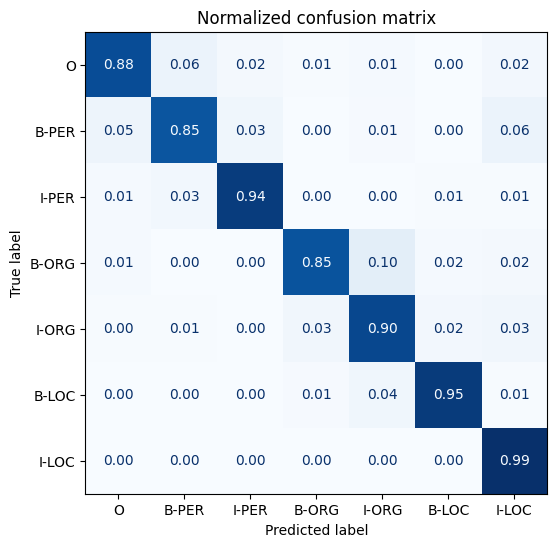

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from matplotlib import pyplot as plt

# Get confusion matrix for validation set

def plot_confusion_matrix(y_preds, y_true, labels):
    cmatrix = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(df_tokens["labels"], df_tokens["predicted_label"], tags.names)

Sequences with high loss

In [112]:
def get_samples(df):
    for _, row in df.iterrows():
        labels, preds, tokens, losses = [], [], [], []

        for i, mask in enumerate(row["attention_mask"]):
            # Skip padding tokens and special tokens
            if i not in (0, len(row["attention_mask"])):   
                labels.append(row["labels"][i])
                preds.append(row["predicted_label"][i])
                tokens.append(row["input_tokens"][i])
                losses.append(f"{row['loss'][i]:.2f}")
            
        df_tmp = pd.DataFrame({"tokens": tokens, "labels": labels,
            "preds": preds, "losses": losses}).T
        
        yield df_tmp


In [113]:
df["total_loss"] = df["loss"].apply(sum)
df_tmp = df.sort_values(by="total_loss", ascending=False).head(3)

for sample in get_samples(df_tmp):
    display(sample)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
tokens,▁',▁'',▁Τ,Κ,▁'',▁',▁',▁'',▁T,▁'',▁',ri,▁'',▁',k,▁'',▁',ala,</s>
labels,O,O,O,IGN,O,O,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,IGN
preds,O,O,B-ORG,I-ORG,O,O,O,O,B-ORG,O,O,O,O,O,O,O,O,O,O
losses,0.00,0.00,4.58,-0.00,0.00,0.00,10.56,9.60,8.45,5.35,6.87,-0.00,6.59,7.40,-0.00,7.19,8.01,-0.00,-0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
tokens,▁'',8,.,▁Juli,▁'',▁:,▁Protest,camp,▁auf,▁dem,▁Gelände,▁der,▁Republika,n,ischen,▁Gar,de,</s>
labels,B-ORG,IGN,IGN,I-ORG,I-ORG,I-ORG,I-ORG,IGN,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,IGN,IGN,I-ORG,IGN,IGN
preds,O,O,O,O,O,O,O,O,O,O,O,O,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG
losses,8.34,-0.00,-0.00,6.26,8.08,9.09,6.22,-0.00,7.27,9.11,6.92,5.72,6.46,-0.00,-0.00,0.02,-0.00,-0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
tokens,▁United,▁Nations,▁Multi,dimensional,▁Integra,ted,▁Stabil,ization,▁Mission,▁in,▁the,▁Central,▁African,▁Republic,</s>
labels,B-PER,I-PER,I-PER,IGN,I-PER,IGN,I-PER,IGN,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG
losses,5.97,5.27,5.98,-0.00,5.74,-0.00,5.66,-0.00,5.36,5.89,5.90,5.64,5.51,5.43,-0.00


# Cross Lingual Transfer

In [124]:
def get_f1_score(trainer, dataset):
    # Move trainer to cpu
    trainer.model.to("cpu")
    return trainer.predict(dataset).metrics["test_f1"]

In [125]:
f1_scores = defaultdict(dict)
f1_scores["de"]["de"] = get_f1_score(trainer, panx_de_encoded["test"])
print(f"F1-score of [de] model on [de] dataset: {f1_scores['de']['de']:.3f}")

  0%|          | 0/263 [00:00<?, ?it/s]

F1-score of [de] model on [de] dataset: 0.862


In [126]:
text_fr = "Jeff Dean est informaticien chez Google en Californie"
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁est,▁informatic,ien,▁chez,▁Google,▁en,▁Cali,for,nie,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,I-LOC,I-LOC,O


In [127]:
def evaluate_lang_performance(lang, trainer):
    panx_ds = encode_dataset(panx_ch[lang])
    return get_f1_score(trainer, panx_ds["test"])

In [128]:
f1_scores["de"]["fr"] = evaluate_lang_performance("fr", trainer)
print(f"F1-score of [de] model on [fr] dataset: {f1_scores['de']['fr']:.3f}")

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

F1-score of [de] model on [fr] dataset: 0.692


In [129]:
f1_scores["de"]["it"] = evaluate_lang_performance("it", trainer)
print(f"F1-score of [de] model on [it] dataset: {f1_scores['de']['it']:.3f}")

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

F1-score of [de] model on [it] dataset: 0.682


In [130]:
f1_scores["de"]["en"] = evaluate_lang_performance("en", trainer)
print(f"F1-score of [de] model on [en] dataset: {f1_scores['de']['en']:.3f}")

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

F1-score of [de] model on [en] dataset: 0.585


# When Does Zero-Shot Transfer Make Sense?

In [131]:
def train_on_subset(dataset, num_samples):
    
    train_ds = dataset["train"].shuffle(seed=42).select(range(num_samples))
    valid_ds = dataset["validation"]
    test_ds = dataset["test"]
    training_args.logging_steps = len(train_ds) // batch_size

    # Initialize model from scratch
    trainer = Trainer(model_init=model_init, args=training_args,
                        data_collator=data_collator, compute_metrics=compute_metrics,
                        train_dataset=train_ds, eval_dataset=valid_ds, tokenizer=xlmr_tokenizer)
    trainer.model.to(device)
    trainer.train()

    f1_score = get_f1_score(trainer, test_ds)
    
    return pd.DataFrame.from_dict(
        {
            "num_samples": [len(train_ds)], 
            "f1_score": [f1_score]
        }
    )

In [132]:
panx_fr_encoded = encode_dataset(panx_ch["fr"])

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

In [133]:
training_args.push_to_hub = False
# Fine-tuning on French with 250 data points underperforms the
# zero-shot transfer from German by a large margin
metrics_df = train_on_subset(panx_fr_encoded, 250)
metrics_df

TypeError: __init__() got an unexpected keyword argument 'device'

In [ ]:
for num_samples in [500, 1000, 2000, 4000]:
    metrics_df = metrics_df.append(train_on_subset(panx_fr_encoded, num_samples), 
                                    ignore_index=True)

After 750 training examples, fine-tuning on French reaches a similar level of performance as fine-tuning on German

In [ ]:
fig, ax = plt.subplots()
ax.axhline(f1_scores["de"]["fr"], ls="--", color="r")
metrics_df.set_index("num_samples").plot(ax=ax)

plt.legend(["Zero-shot from de", "Fine-tuned on fr"], loc="lower right")
plt.ylim((0, 1))
plt.xlabel("Number of Training Samples")
plt.ylabel("F1 Score")
plt.show()

# Multi Language Fine-Tuning at Once

Concatenate German and French dataset to check for performance improvement

In [ ]:
from datasets import concatenate_datasets

def concatenate_splits(corpora):
    multi_corpus = DatasetDict()
    for split in corpora[0].keys():
        multi_corpus[split] = concatenate_datasets(
                                    [corpus[split] for corpus in corpora]).shuffle(seed=42)
    
    return multi_corpus

In [ ]:
panx_de_fr_encoded = concatenate_splits([panx_de_encoded, panx_fr_encoded])

In [57]:
training_args.logging_steps = len(panx_de_fr_encoded["train"]) // batch_size
training_args.push_to_hub = True
training_args.output_dir = "xlm-roberta-base-finetuned-panx-de-fr"

trainer = Trainer(model_init=model_init, args=training_args,
                    data_collator=data_collator, compute_metrics=compute_metrics,
                    tokenizer=xlmr_tokenizer, train_dataset=panx_de_fr_encoded["train"],
                    eval_dataset=panx_de_fr_encoded["validation"])

NameError: name 'panx_de_fr_encoded' is not defined

In [ ]:
trainer.train()
# trainer.push_to_hub(commit_message="Training completed!")

In [ ]:
for lang in langs:
    f1 = evaluate_lang_performance(lang, trainer)
    print(f"F1-score of [de-fr] model on [{lang}] dataset: {f1:.3f}")

Concatenate all langugaes dataset to check for performance improvement

In [ ]:
corpora = [panx_de_encoded]

# Exclude German from iteration
for lang in langs[1:]:
    training_args.output_dir = f"xlm-roberta-base-finetuned-panx-{lang}"
    # Fine-tune on monolingual corpus
    ds_encoded = encode_dataset(panx_ch[lang])
    metrics = train_on_subset(ds_encoded, ds_encoded["train"].num_rows)
    # Collect F1-scores in common dict
    f1_scores[lang][lang] = metrics["f1_score"][0]
    # Add monolingual corpus to list of corpora to concatenate
    corpora.append(ds_encoded)

In [ ]:
corpora_encoded = concatenate_splits(corpora)

In [ ]:
training_args.logging_steps = len(corpora_encoded["train"]) // batch_size
training_args.output_dir = "xlm-roberta-base-finetuned-panx-all"

trainer = Trainer(model_init=model_init, args=training_args,
                    data_collator=data_collator, compute_metrics=compute_metrics,
                    tokenizer=xlmr_tokenizer, train_dataset=corpora_encoded["train"],
                    eval_dataset=corpora_encoded["validation"])

In [ ]:
trainer.train()
trainer.push_to_hub(commit_message="Training completed!")

Get F1-score for each language

In [ ]:
for idx, lang in enumerate(langs):
    f1_scores["all"][lang] = get_f1_score(trainer, corpora[idx]["test"])

In [ ]:
scores_data = {
    "de": f1_scores["de"],
    "each": {lang: f1_scores[lang][lang] for lang in langs},
    "all": f1_scores["all"]
}

In [ ]:
f1_scores_df = pd.DataFrame(scores_data).T.round(4)
f1_scores_df.rename_axis(index="Fine-tune on", columns="Evaluated on", inplace=True)

In [ ]:
f1_scores_df

Check for MAD-X adaption